In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from collections import deque
import random
import tensorflow as tf

env = gym.make("CartPole-v1")
state = env.reset()

In [2]:
model = Sequential()
model.add(Dense(units = 50, input_dim=4, activation='relu'))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 2, activation = "linear"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='MSE',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,902
Trainable params: 2,902
Non-trainable params: 0
_________________________________________________________________


------------------------------------

In [3]:
train_episodes = 200
epsilon = 0.3
gamma = 0.99
max_steps = 200
state = env.reset()

In [5]:
Loss = []
Rewards = []

for e in range(1, train_episodes+1):
  epsilon = epsilon - (1/train_episodes)
  total_reward = 0
  t = 0

  state = env.reset()
  state = np.reshape(state, [1, 4])  
  
  done = False
  while t < max_steps and done == False:

    Qs = model.predict(state)[0]

    if np.random.rand()<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Qs)

    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 4])

    total_reward += reward

   
    if done:
      y = reward
    else:
      y = reward + gamma*np.max(model.predict(next_state)[0])
    
    Q_target = model.predict(state)
    Q_target[0][action] = y
          
    h = model.fit(state,Q_target,epochs=1,verbose=0)

    loss = h.history['loss'][0]
    
    state = next_state
    t+=1
  
  print(e," R=",total_reward," L=",loss)
  Rewards.append(total_reward)
  Loss.append(loss)
  

1  R= 71.0  L= 134.9114532470703
2  R= 24.0  L= 157.6346893310547
3  R= 14.0  L= 136.4621124267578
4  R= 12.0  L= 103.22563171386719
5  R= 11.0  L= 80.5298843383789
6  R= 19.0  L= 71.43559265136719
7  R= 30.0  L= 75.9083251953125
8  R= 81.0  L= 451.1854248046875
9  R= 12.0  L= 399.5413513183594
10  R= 11.0  L= 269.6728515625
11  R= 15.0  L= 261.9962463378906
12  R= 19.0  L= 236.61297607421875
13  R= 97.0  L= 334.1365661621094
14  R= 12.0  L= 183.38900756835938
15  R= 10.0  L= 152.6509246826172
16  R= 10.0  L= 99.5481948852539
17  R= 9.0  L= 66.09803771972656
18  R= 10.0  L= 40.239315032958984
19  R= 12.0  L= 43.96394729614258
20  R= 10.0  L= 31.31316566467285
21  R= 17.0  L= 32.13184356689453
22  R= 23.0  L= 38.82234573364258
23  R= 31.0  L= 49.903228759765625
24  R= 67.0  L= 293.7012939453125
25  R= 15.0  L= 243.34535217285156
26  R= 16.0  L= 231.4177703857422
27  R= 12.0  L= 207.8077850341797
28  R= 9.0  L= 177.63002014160156
29  R= 10.0  L= 128.7647247314453
30  R= 9.0  L= 96.769943

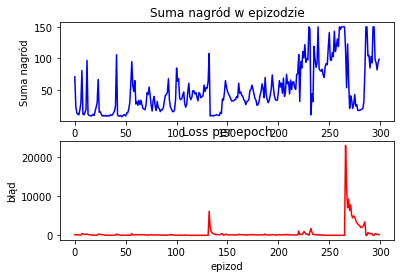

In [6]:
plt.subplot(211)
plt.ylabel('Suma nagród')  
plt.title('Suma nagród w epizodzie')
plt.plot(list(range(train_episodes)),Rewards,"b")

plt.subplot(212)
plt.xlabel('epizod')
plt.ylabel('błąd')  
plt.title('Loss per epoch')
plt.plot(list(range(train_episodes)),Loss,"r")

plt.show()